<a href="https://colab.research.google.com/github/AlapanDas/Car-Price-Detection-Model/blob/main/Car_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression
from sklearn import metrics


In [28]:
#Importing the Files
car_dataset=pd.read_csv('car data.csv')
car_dataset.head()
car_dataset.shape

(301, 9)

In [29]:
#checking for empty places
car_dataset.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [30]:
#checking categories of data
print(car_dataset.Fuel_Type.value_counts())
print(car_dataset.Seller_Type.value_counts())
print(car_dataset.Transmission.value_counts())

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64
Dealer        195
Individual    106
Name: Seller_Type, dtype: int64
Manual       261
Automatic     40
Name: Transmission, dtype: int64


In [31]:
#Encoding the data 
car_dataset.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2}},inplace=True)
car_dataset.replace({'Seller_Type':{'Dealer':0,'Individual':1}},inplace=True)
car_dataset.replace({'Transmission':{'Manual':0,'Automatic':1,}},inplace=True)

In [32]:
car_dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


Splitting into Train and Test Data

In [33]:
X=car_dataset.drop(['Car_Name','Selling_Price'],axis=1)
Y=car_dataset['Selling_Price']


In [34]:
print(X)

     Year  Present_Price  Kms_Driven  Fuel_Type  Seller_Type  Transmission  \
0    2014           5.59       27000          0            0             0   
1    2013           9.54       43000          1            0             0   
2    2017           9.85        6900          0            0             0   
3    2011           4.15        5200          0            0             0   
4    2014           6.87       42450          1            0             0   
..    ...            ...         ...        ...          ...           ...   
296  2016          11.60       33988          1            0             0   
297  2015           5.90       60000          0            0             0   
298  2009          11.00       87934          0            0             0   
299  2017          12.50        9000          1            0             0   
300  2016           5.90        5464          0            0             0   

     Owner  
0        0  
1        0  
2        0  
3        0 

In [35]:
print(Y)

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 301, dtype: float64


In [36]:
#Splitting Train and Test Data
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.1,random_state=2)

1. Linear Regression

In [37]:
#Model Training (Linear)
lin_reg_model=LinearRegression()


In [38]:
lin_reg_model.fit(X_train,Y_train)


LinearRegression()

In [39]:
#Predicting Data
prediction_model=lin_reg_model.predict(X_train)

In [40]:
#Error
error_score=metrics.r2_score(Y_train,prediction_model)

In [41]:
print("R square Value",error_score)

R square Value 0.8799451660493711


Visualising the Regression Model

Text(0, 0.5, 'Predicted Prices')

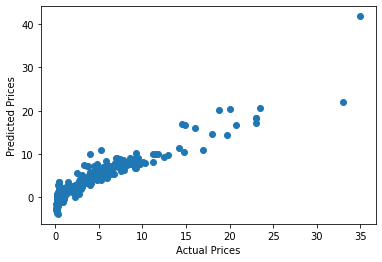

In [42]:
plt.scatter(Y_train,prediction_model)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")

Testing Data

In [43]:
#Testing Data
test_model=lin_reg_model.predict(X_test)

In [44]:
#Error
error_score=metrics.r2_score(Y_test,test_model)

In [45]:
print("R square Value",error_score)

R square Value 0.8365766715027051


Text(0, 0.5, 'Predicted Prices')

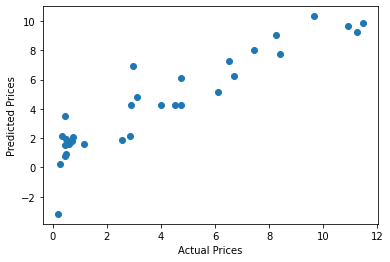

In [46]:
plt.scatter(Y_test,test_model)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")

2. Lasso 

In [47]:
#Model Training (Lasso)
lasso_reg_model=Lasso()

In [48]:
lasso_reg_model.fit(X_train,Y_train)


Lasso()

In [49]:
#Predicting Data
prediction_model=lasso_reg_model.predict(X_train)

In [50]:
#Error
error_score=metrics.r2_score(Y_train,prediction_model)

In [51]:
print("R square Value",error_score)

R square Value 0.8427856123435794


Visualising the Regression Model

Text(0, 0.5, 'Predicted Prices')

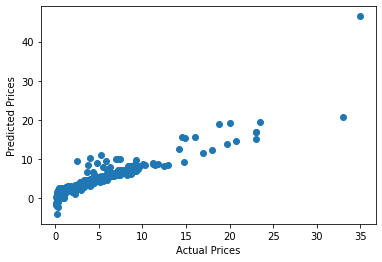

In [52]:
plt.scatter(Y_train,prediction_model)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")

Testing Data

In [53]:
#Testing Data
test_model=lasso_reg_model.predict(X_test)

In [54]:
#Error
error_score=metrics.r2_score(Y_test,test_model)

In [55]:
print("R square Value",error_score)

R square Value 0.8709167941173195


Text(0, 0.5, 'Predicted Prices')

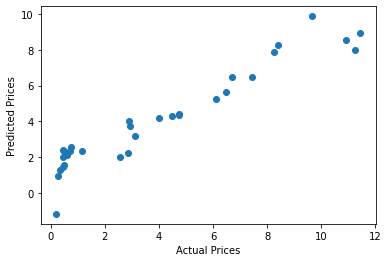

In [56]:
plt.scatter(Y_test,test_model)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")